# <center> A Convolutional Neural Network Implementation </center> 

This tutorial focuses on building a CNN using Keras
 
You will need to the following libraries to run this code:
* __[numpy](http://www.numpy.org/)__
* __[matplotlib](https://matplotlib.org/)__
* __[tensorflow](https://www.tensorflow.org/)__
* __[keras](https://keras.io/)__

In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)
print('train images shape:', train_images.shape)
print('train labels shape:', train_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

train images shape: (60000, 28, 28)
train labels shape: (60000, 10)
test images shape: (10000, 28, 28)
test labels shape: (10000, 10)


#### Data normalization 
Let's also normalize the data by subtracting the mean and dividing by the standard deviation. Notice that
the mean and std of the training set are used in both cases.

In [3]:
train_images = train_images.astype(np.float32)
mean = np.mean(train_images)
std = np.std(train_images)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

## Building the CNN model
Next, we will build a CNN model. Keras has a very simple API, in which we first instantiate a model, and then
add layers to it. The first layer added should define the size of input the CNN should expect. We will add first
a convolutional layer. We need to set the number of filters (kernels or units) in the layer, the size of the filters,
the type of padding to use to handle the edges, and the activation function to use. There are many other
things you can set in the layer (check keras docs). Notice how we define the input shape; these are 28x28
pixel images, and the last entry is the number of channels. Grayscale images have 1 channel, RGB images
have 3.

In [4]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'
, input_shape=(28, 28, 1)))

Next we will add a max pooling layer, leaving the default parameters. This should reduce the size of the
images to 14x14.

In [5]:
cnn.add(MaxPool2D())

Let's add another convolutional/maxpooling layers, reducing the size of the images to 7x7.

In [6]:
cnn.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

In [7]:
cnn.add(MaxPool2D())

Next, we want to add some fully connected layers. To do this, first we need to 'flatten' the output of the
previous layer, which has shape batch_sizex7x7x64, into batch_sizex3136.

In [8]:
cnn.add(Flatten())

Now let's add a fully connected layer with 512 units, and ReLU activation.

In [9]:
cnn.add(Dense(512, activation='relu'))

Before we add another fully connected layer, let's also add a 'dropout' layer. Dropout is a recent
regularization technique commonly used in deep networks. Regularization refers to methods that try to
reduce a phenonmenon called 'overfitting', in which the model performs well on the training data, but poorly
on the test data.

In [10]:
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))

Finally we will add the last layer. Since this is a classifcation problem with 10 classes, we will add a layer
with 10 units and softmax activations.

In [11]:
cnn.add(Dense(10, activation='softmax'))

Now that our CNN model is complete, we need to compile it, specifying the optimizer to use and the loss
function. We will use the Adam optimizer with default parameters, and, since this is a mutliclass
classification problem, we will use the catrgorical cross entropy loss. We will use accuracy as a metric (this is just
used to keep track of performance, but does not affect the training).

In [12]:
## Compile the model

In [13]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
## Train the model

We are ready now to train the model. We can specify the batch size and the number of epochs for training.
Notice that we need to modify the shape of the input first to add the channels dimension. Note that
depending on what machine you are using, this might take a while to run.

In [15]:
cnn.fit(train_images.reshape(-1, 28, 28, 1), 
        train_labels, 
        batch_size=32, 
        epochs=5,
        validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/5
1875/1875 [==============================] - 68s 6ms/step - loss: 0.1638 - accuracy: 0.9491 - val_loss: 0.0561 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0653 - accuracy: 0.9815 - val_loss: 0.0333 - val_accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.0418 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.0303 - val_accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0365 - accuracy: 0.9897 - val_loss: 0.0289 - val_accuracy: 0.9913


In [29]:
cnn.evaluate(test_images.reshape(-1, 28, 28, 1),test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0289 - accuracy: 0.9913


[0.028918975964188576, 0.9912999868392944]

### Visualization
It may be interesting to visualize the 64 3x3 CNN filters learned in the first convolutional layers.

In [30]:
weights = cnn.get_weights()[0]
print(weights.shape)

(3, 3, 1, 64)


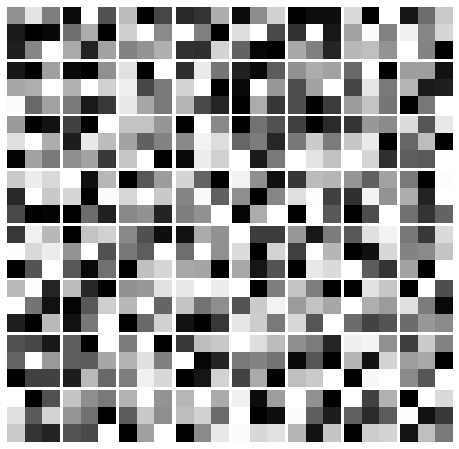

In [31]:
fig = plt.figure(facecolor='w', edgecolor='w', figsize=(8, 8))
fig.subplots_adjust(wspace=0.05, hspace=0.05)
for i in range(64):
 sp = fig.add_subplot(8, 8, i+1)
 sp.set_axis_off()
 plt.imshow(weights[:, :, 0, i])
 plt.set_cmap('gray')
plt.show()

Although not very clear, the filters learn to look for elemntary concepts like oriented edges, symmetries, etc.